In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

## Clustering of CSV Files per Plate

In [23]:
import sys
sys.path.append('/Users/antonialutz/code/ThorstenCodes/MorphoMind/')
from data_handling.params import LOCAL_DATA_PATH
platenr = '24277' #change Plate Number here
csv_file_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/mean_well_profiles.csv')


In [24]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Preprocess the data: let's assume all columns except the first one (usually an ID or label column) are features
features = df.columns[1:]
X = df[features]


In [25]:
# Assuming the first column contains non-numeric data
numeric_data = df.select_dtypes(include=[np.number])

# Perform imputation on numeric data only
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

/Users/antonialutz/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Metadata_pert_id_vendor']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [26]:
n_clusters = 4  # This is an example, adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)
#df['Cluster'] = kmeans.fit_predict(numeric_data_scaled)

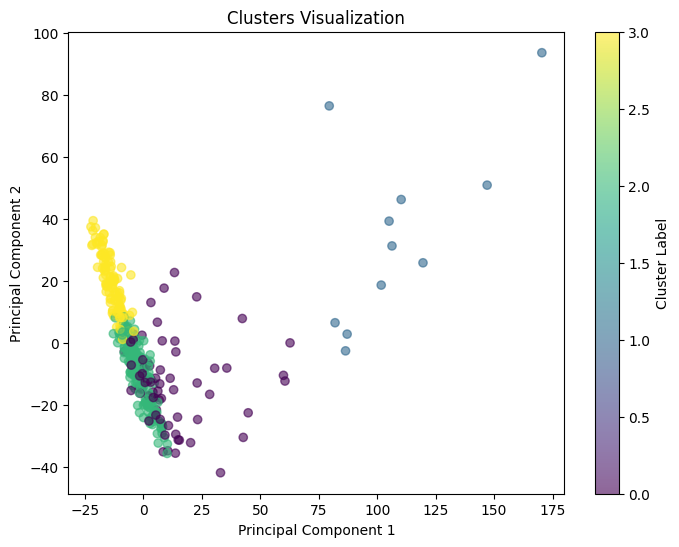

In [27]:
# Reduce the data to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Create New Processed_CSV folder with the Labels

In [28]:
#Specify the new file path for saving
new_csv_file_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/processed/{platenr}_wells_labeled.csv')

In [29]:
# Add the cluster labels to the DataFrame as a new column called 'Labels'
df['Labels'] = clusters

In [30]:
# Save the updated DataFrame to the new CSV file
df.to_csv(new_csv_file_path, index=False)  # Set index=False to avoid saving with an unnamed index column